<a href="https://colab.research.google.com/github/mattematica/passion-stats-python/blob/main/unit4_chisquare_bonferroniadj_lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Header Block

In [1]:
# This header will be the same no matter what code you are using
# import modules that we will use multiple functions from and give them short names. 

import pandas as pd;
import numpy as np;
import seaborn as sb;
import matplotlib.pyplot as plt;


# import single functions

from scipy.stats.contingency import chi2_contingency;
from itertools import combinations;
from statsmodels.graphics.mosaicplot import mosaic;
from scipy.stats.contingency import chi2_contingency;
from scipy.stats import pearsonr;
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as multi

# Data Management Block

In [2]:
# Import Variables
addhealth_url = 'https://drive.google.com/uc?export=download&id=1LOoZl4utpqTfKjj6nu70RH16frFLyPfm'
myData = pd.read_csv(addhealth_url, usecols=['H4GH7','H4MH20'],low_memory=False)


# Rename Variables
myData.rename(columns={
    'H4GH7':'PERCIEVED_WEIGHT',
    'H4MH20':'JUST_AS_GOOD',
},inplace=True)


# Deal with non-responses and legit skips
myData['JUST_AS_GOOD'].replace({
    6:np.nan,
    8:np.nan,
},inplace=True)

myData['PERCIEVED_WEIGHT'].replace({
    6:np.nan,
    8:np.nan,
},inplace=True)

# collapse vars/create sec. vars/deal with time

def collapse_var(row,var_name):
  if(row[var_name] in [0]):
    return 0
  elif (row[var_name] in [1,2,3]):
    return 1
myData['JUST_AS_GOOD2'] = myData.apply(lambda row: collapse_var(row,'JUST_AS_GOOD'),axis=1)

# Text Labels

myData['JUST_AS_GOOD2'].replace({
    0:'No',
    1:'Yes',
},inplace=True)

myData['PERCIEVED_WEIGHT'].replace({
    1:'very underweight',
    2:'slightly underweight',
    3:'about right',
    4:'slightly overweight',
    5:'very overweight',
},inplace=True)

In [3]:
pd.crosstab(myData['JUST_AS_GOOD2'], myData['PERCIEVED_WEIGHT'])

PERCIEVED_WEIGHT,about right,slightly overweight,slightly underweight,very overweight,very underweight
JUST_AS_GOOD2,,,,,
No,78,95,27,43,4
Yes,1690,2108,357,667,38


In [4]:
pd.crosstab(myData['JUST_AS_GOOD2'], myData['PERCIEVED_WEIGHT'], normalize='columns')

PERCIEVED_WEIGHT,about right,slightly overweight,slightly underweight,very overweight,very underweight
JUST_AS_GOOD2,,,,,
No,0.044118,0.043123,0.070312,0.060563,0.095238
Yes,0.955882,0.956877,0.929688,0.939437,0.904762


(<Figure size 432x288 with 3 Axes>,
 {('very overweight', 'Yes'): (0.0,
   0.0,
   0.13629889002791248,
   0.9363155678255579),
  ('very overweight', 'No'): (0.0,
   0.9396378269617705,
   0.13629889002791248,
   0.060362173038229404),
  ('slightly underweight', 'Yes'): (0.14120085081222622,
   0.0,
   0.0737165827756597,
   0.9265988372093023),
  ('slightly underweight', 'No'): (0.14120085081222622,
   0.9299210963455149,
   0.0737165827756597,
   0.07007890365448505),
  ('about right', 'Yes'): (0.21981939437219963,
   0.0,
   0.33940343319626654,
   0.9527066640609732),
  ('about right', 'No'): (0.21981939437219963,
   0.9560289231971858,
   0.33940343319626654,
   0.0439710768028141),
  ('slightly overweight', 'Yes'): (0.5641247883527799,
   0.0,
   0.4229104996218185,
   0.9536979926195477),
  ('slightly overweight', 'No'): (0.5641247883527799,
   0.9570202517557603,
   0.4229104996218185,
   0.042979748244239564),
  ('very underweight', 'Yes'): (0.9919372487589122,
   0.0,
   0.00

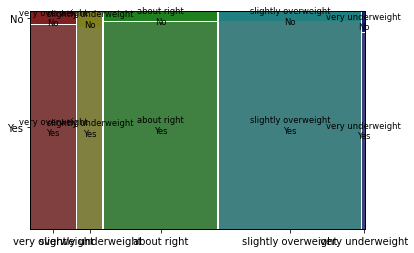

In [6]:
mosaic(data=myData, index=['PERCIEVED_WEIGHT','JUST_AS_GOOD2'])

In [7]:
ct = pd.crosstab(myData['JUST_AS_GOOD2'], myData['PERCIEVED_WEIGHT'])
test_stat, p_val, degfree, expected = chi2_contingency(ct)
print(f"Test-Stat={test_stat}, P-Value={p_val}")

Test-Stat=10.327371267600432, P-Value=0.0352598372406609


In [8]:
levels=['very underweight','slightly underweight','about right','slightly overweight','very overweight']

exp_var = 'PERCIEVED_WEIGHT'
res_var = 'JUST_AS_GOOD2'

for comb in combinations(levels,2):
  df = myData[(myData[exp_var] == comb[0] ) | (myData[exp_var] == comb[1])]
  print(f"Testing {comb}:\n")
  print(pd.crosstab(df[res_var], df[exp_var],normalize='columns'))
  test_stat,p_val,degfree, expected = chi2_contingency(pd.crosstab(df[res_var], df[exp_var]))
  print(f"\n Test-Stat={test_stat}, and P-Value={p_val}\n")

Testing ('very underweight', 'slightly underweight'):

PERCIEVED_WEIGHT  slightly underweight  very underweight
JUST_AS_GOOD2                                           
No                            0.070312          0.095238
Yes                           0.929688          0.904762

 Test-Stat=0.07705377194773369, and P-Value=0.7813304782640481

Testing ('very underweight', 'about right'):

PERCIEVED_WEIGHT  about right  very underweight
JUST_AS_GOOD2                                  
No                   0.044118          0.095238
Yes                  0.955882          0.904762

 Test-Stat=1.4377574167554852, and P-Value=0.23050258414400476

Testing ('very underweight', 'slightly overweight'):

PERCIEVED_WEIGHT  slightly overweight  very underweight
JUST_AS_GOOD2                                          
No                           0.043123          0.095238
Yes                          0.956877          0.904762

 Test-Stat=1.5630530163856586, and P-Value=0.21121875930222464

Testin